In [18]:
from utility import dse, parse_pickle, plot
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('./result/pickle/random_test_cm0_rt30_mr50.pickle', 'rb') as f:
    histories_random = pickle.load(f)

with open('./result/pickle/multi_fidelity_test_cm0_rt30_mr100.pickle', 'rb') as f:
    histories_multi_fidelity = pickle.load(f)

with open('./result/pickle/single_fidelity_test_cm0_rt30_mr50.pickle', 'rb') as f:
    histories_single_fidelity = pickle.load(f)


points_multi_fidelity, curve_highest_mean_multi_fidelity, pareto_front_multi_fidelity = plot.get_highest_mean_curve(histories_multi_fidelity, strategy='multi_fidelity', iterations=200)
points_single_fidelity, curve_highest_mean_single_fidelity, pareto_front_single_fidelity = plot.get_highest_mean_curve(histories_single_fidelity, strategy='single_fidelity', iterations=200)
points_random, curve_highest_mean_random, pareto_front_random = plot.get_highest_mean_curve(histories_random, strategy='random', iterations=200)


2
2
2


In [19]:
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('deep')
plt.figure(figsize=(10,6), tight_layout=True)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

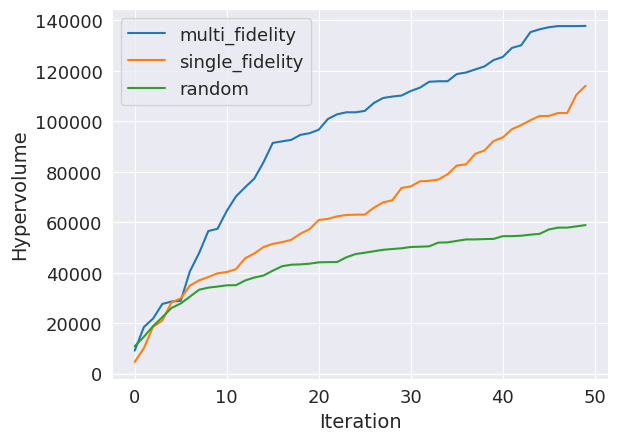

In [20]:
plt.plot(np.arange(len(curve_highest_mean_multi_fidelity)), curve_highest_mean_multi_fidelity, label='multi_fidelity')
plt.plot(np.arange(len(curve_highest_mean_single_fidelity)), curve_highest_mean_single_fidelity, label='single_fidelity')
plt.plot(np.arange(len(curve_highest_mean_random)), curve_highest_mean_random, label='random')

plt.xlabel('Iteration')
plt.ylabel('Hypervolume')

plt.legend()
plt.show()

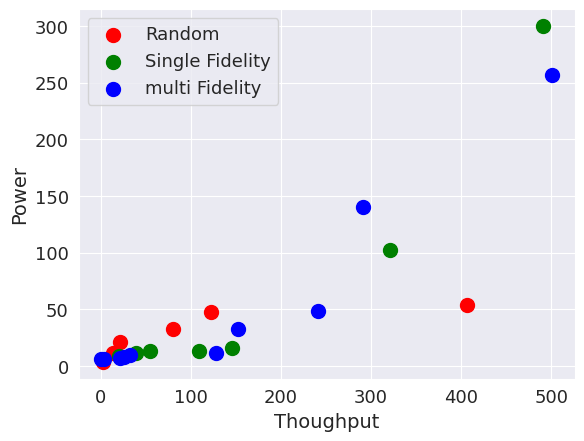

In [25]:
run_time = 10

plt.scatter(-pareto_front_random[run_time][:, 0], pareto_front_random[run_time][:, 1], s=100, c='red', marker='o', label='Random')
plt.scatter(-pareto_front_single_fidelity[run_time][:, 0], pareto_front_single_fidelity[run_time][:, 1], s=100, c='green', marker='o', label='Single Fidelity')
plt.scatter(-pareto_front_multi_fidelity[run_time][:, 0], pareto_front_multi_fidelity[run_time][:, 1], s=100, c='blue', marker='o', label='multi Fidelity')

plt.xlabel('Thoughput')
plt.ylabel('Power')

plt.legend()
plt.show()

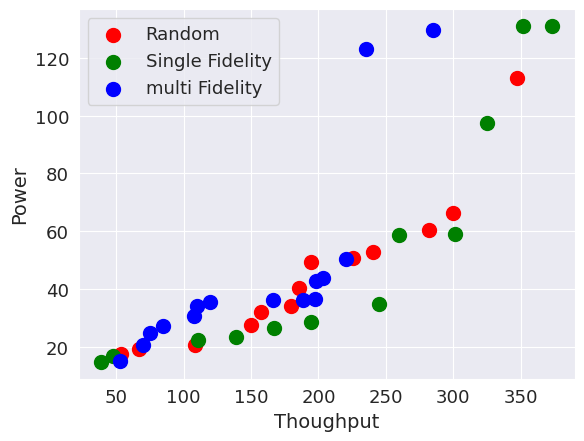

In [8]:
run_time = 5

plt.scatter(-pareto_front_random[run_time][:, 0], pareto_front_random[run_time][:, 1], s=100, c='red', marker='o', label='Random')
plt.scatter(-pareto_front_single_fidelity[run_time][:, 0], pareto_front_single_fidelity[run_time][:, 1], s=100, c='green', marker='o', label='Single Fidelity')
plt.scatter(-pareto_front_multi_fidelity[run_time][:, 0], pareto_front_multi_fidelity[run_time][:, 1], s=100, c='blue', marker='o', label='multi Fidelity')
# points_random_ = points_random[points_random[:, :, 1] < 100]
# print(points_random_)

# plt.scatter(-points_random_[:, 0], points_random_[:, 1], s=100, c='red', marker='o', label='Random')
# plt.scatter(-points_single_fidelity[:, :, 0], points_single_fidelity[:, :, 1], s=100, c='green', marker='o', label='Single Fidelity')



plt.xlabel('Thoughput')
plt.ylabel('Power')

plt.legend()
plt.show()